In [22]:
from distribution_generator.distributions import get_rv

mutinfo = 1.0

rv = get_rv(mutinfo,2,2,10,10,n_generations=300, min_val=1e-2)
print(rv.joint_dist)
rv2 = get_rv(mutinfo,2,2,10,10,n_generations=300, min_val=1e-2)
x,y = rv2.rvs(size=10000)
print(rv2.entropy)
print(rv2.mutual_information)

Best fitness: -5.5859817061049144e-05: 100%|██████████| 300/300 [00:02<00:00, 109.70it/s]


[[3.21176381e-07 2.47210972e-07 4.14428457e-07 ... 8.64376900e-07
  1.44905536e-06 1.11534473e-06]
 [2.34912349e-07 7.87548727e-09 3.03118062e-07 ... 2.75367603e-08
  1.05985689e-06 3.55319312e-08]
 [1.01474590e-08 7.81054696e-09 2.99435982e-07 ... 2.73096955e-08
  1.04698244e-06 8.05867308e-07]
 ...
 [2.29406754e-13 7.69091102e-15 2.96013943e-13 ... 7.66618319e-09
  2.95062199e-07 9.89202400e-09]
 [9.90963500e-15 7.62749270e-15 2.92418159e-13 ... 7.60296877e-09
  2.91477976e-07 2.24351970e-07]
 [7.24802873e-15 2.42991730e-16 2.13878232e-13 ... 2.42210462e-10
  2.13190571e-07 7.14725997e-09]]
11.303978604316143
0.9995904396324053


In [21]:
print(x.shape)

(10000, 1, 10)


[[9847 9389]
 [9293 9821]]


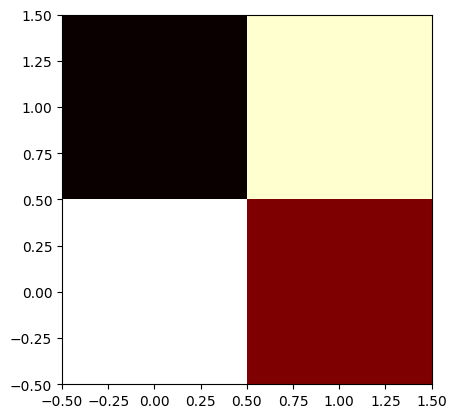

In [17]:
import numpy as np
from matplotlib import pyplot as plt

# Count Occurrences of Each Sample

samples = np.concatenate([x,y],axis=1)

grid = np.array([[0,0],[0,0]])
tot = 0

for sample in samples:
    grid[sample[0],sample[1]] += 1
    tot += 1

print(grid)

plt.imshow(grid, cmap='hot', interpolation='nearest', origin='lower')

In [18]:
import numpy as np

dist = np.array([[0.37513464, 0.24989916],
 [0.00970874, 0.36525746]])

# compute kl with uniform distribution

kl = np.sum(dist * np.log(dist / np.array([[0.25,0.25],[0.25,0.25]])))
print(kl)

# compute mutinfo
px = np.sum(dist, axis=1)
py = np.sum(dist, axis=0)
mutinfo = 0
for i in range(2):
    for j in range(2):
        mutinfo += dist[i,j] * np.log(dist[i,j] / (px[i] * py[j]))
print(mutinfo)

# compute entropy
dist = dist.flatten()
entropy = -np.sum(dist * np.log(dist))
print(entropy)

0.2590839288684114
0.20072102883245946
1.127210432251479


In [19]:
from scipy.stats import binom
import numpy as np

# Parameters for the binomial distribution
n = 10  # number of trials
p = 0.25  # probability of success

# Create a binomial distribution
binom_dist = binom(n, p)

# Calculate the probabilities of each possible outcome
probabilities = binom_dist.pmf(np.arange(n + 1))

# Calculate the entropy
entropy_binom = -np.sum(probabilities * np.log(probabilities))
print(entropy_binom)

1.7144210650734781
